In [1]:
# Animated Bar Chart Example

## Stock data

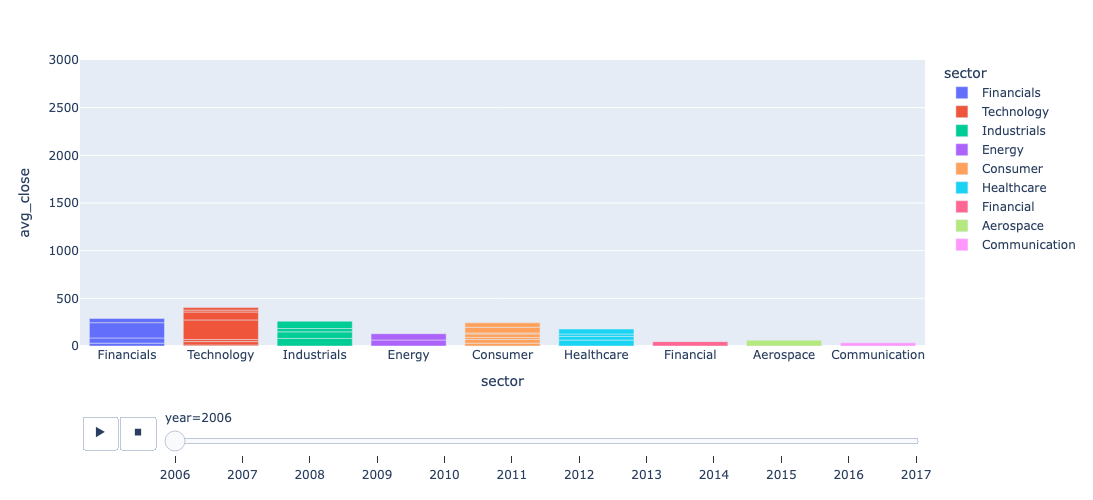

In [5]:
import plotly.express as px
import pandas as pd

# https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231

df_stocks = pd.read_csv('../data/stock_data_2006_thru_2017.csv',comment='#')
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks['year'] = df_stocks['Date'].dt.year

# print(df_stocks.sample(10))
df_sectors = pd.read_csv('../data/stock_sector_company.csv',comment='#')
# print(df_sectors.sample(31))

df_merged = pd.merge(df_stocks, df_sectors, left_on='Name', right_on='stock', how='left')

# print(df_merged.sample(10))


df_yearly = df_merged.groupby(['year','stock','sector','company'])[['Close', 'Volume','Open','High','Low']].mean().reset_index()

df_yearly.rename(columns={'Close': 'avg_close', 'Volume':'avg_volume', 'Open': 'avg_open','High': 'avg_high','Low':'avg_low'}, inplace=True)

# print(df_yearly.sample(31))
# print('sum of avg close:', df_yearly['avg_close'].sum())

# print(df_yearly['avg_close'].min(), df_yearly['avg_close'].max())

fig = px.bar(df_yearly, x='sector', y='avg_close', color='sector',
  animation_frame="year", animation_group="stock", range_y=[0,3000],
            hover_data=['stock','company'])
fig.update_layout(transition = {'duration': 2000}, height=500)

fig.show()

